# Problem statement:-

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker 
    
(Data Mining and Visualization, Silicon Graphics). 
    
A set of reasonably clean records was extracted using the following conditions: 
    
((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. 

These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. 

These are:
    
1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.


We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. 

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights. 

There is one important caveat to remember about this statement. 

That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing necessary libraries

In [3]:
#Linear algebra
import numpy as np

#Data pre-processing
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
from sklearn.preprocessing import LabelEncoder

labelEncoder=LabelEncoder()
df['Income']=labelEncoder.fit_transform(df['Income'])

In [6]:
df.replace('?',np.nan)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Cheking null values

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

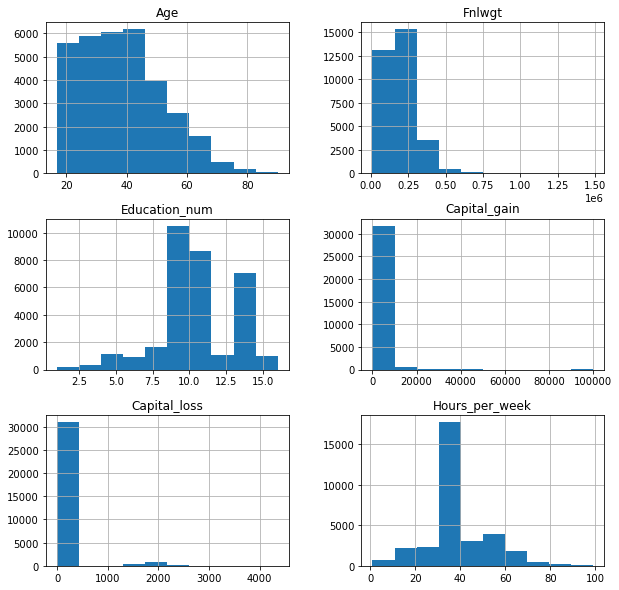

In [9]:
rcParams ['figure.figsize']=10,10
df[['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']].hist()

With the above graph we can understand that We can group the related age people,

Capital Gain,Capital loss columns left skewed need to treat them

Final weight is also left skewed



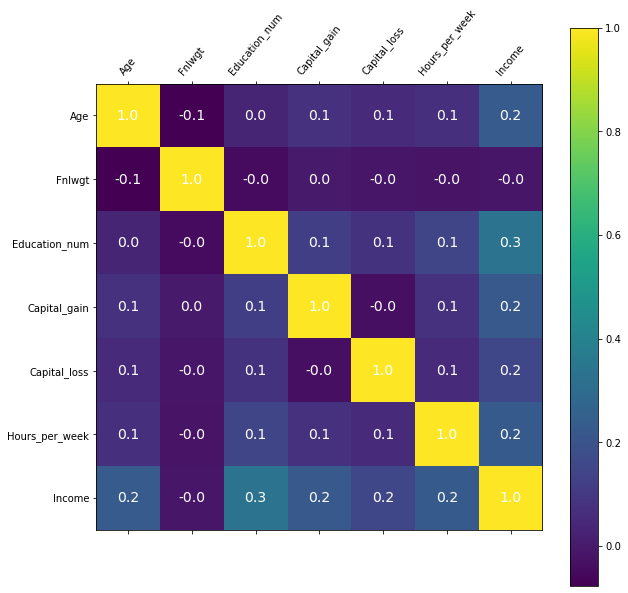

In [10]:
#Plotting correlation between Income and individual features

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)),df.corr().columns.values,rotation=50)
plt.yticks(np.arange(len(df.corr().columns)),df.corr().columns.values)
for (i,j),corr in np.ndenumerate(df.corr()):
    plt.text(j,i,'{:0.1f}'.format(corr),ha='center',va='center',color='white',fontsize=14)

With the above graph it is clear that there is no highly correlation between the continues features and target variable

 and also final weight has 0 correlation with out put class so we can drop that column

In [11]:
df.drop(['Fnlwgt'],axis=1,inplace=True)

In [12]:
df['Age']=pd.cut(df['Age'],bins=[0,25,50,100],labels=['Young','Adult','Old'])

<AxesSubplot:xlabel='Income', ylabel='count'>

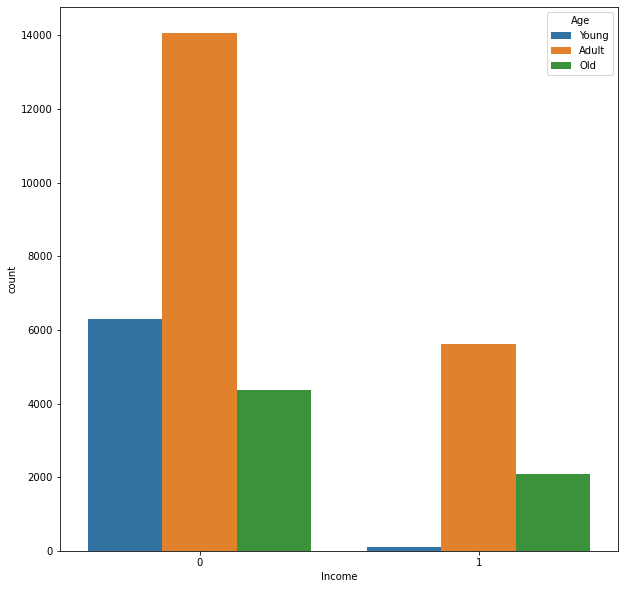

In [13]:
sns.countplot(x='Income',hue='Age',data=df)

With the above graph we can understand that less young people have income more than $50K

#Capital gain and Capital loss  can be combined and trasformed into a feature capital difference.plotting the new feature  corresponding  to income

In [14]:
df['Capital Diff'] = df['Capital_gain'] - df['Capital_loss']
df.drop(['Capital_gain'],axis=1,inplace=True)
df.drop(['Capital_loss'],axis=1,inplace=True)

<AxesSubplot:xlabel='Income', ylabel='count'>

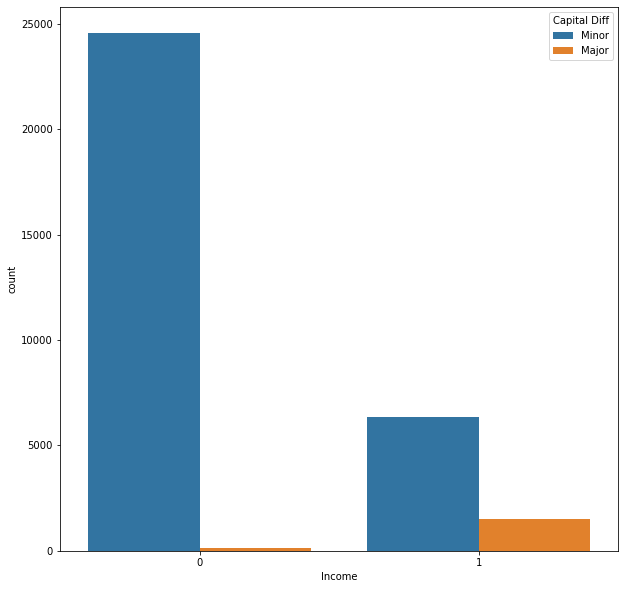

In [15]:
df['Capital Diff'] = pd.cut(df['Capital Diff'],bins = [-5000,5000,100000],labels=['Minor','Major'])
sns.countplot(x='Income',hue='Capital Diff',data=df)

With the above graph we can under stant that for minor there are huge people who's income is less than $50K 

for major there are more pople whose income is morethan $50K



In [16]:
#Dividing hours of week in 3 major  range and plotting it corresponding to the income

df['Hours_per_week'] = pd.cut(df['Hours_per_week'],bins = [0,30,40,100],labels =['Lessor Hours','Normal Hours','Extra Hours'])

<AxesSubplot:xlabel='Income', ylabel='count'>

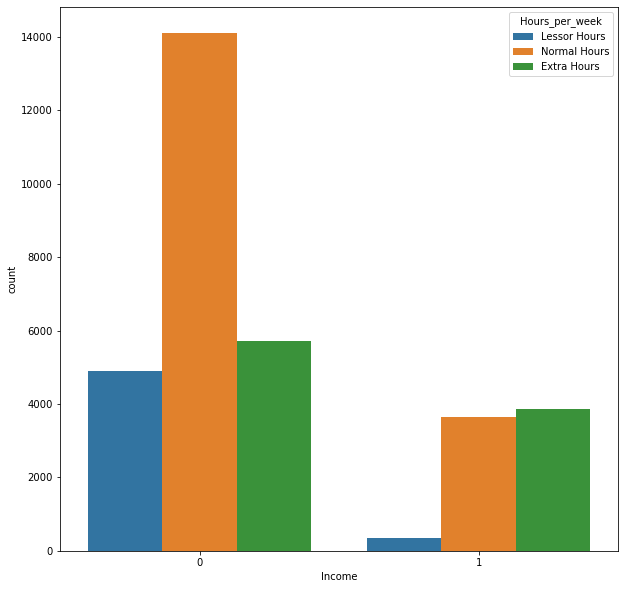

In [17]:
sns.countplot(x='Income',hue='Hours_per_week',data=df)

With the above plot we can understand that as the no of hours increases the people earning more than $50K increases 

<AxesSubplot:xlabel='Income', ylabel='count'>

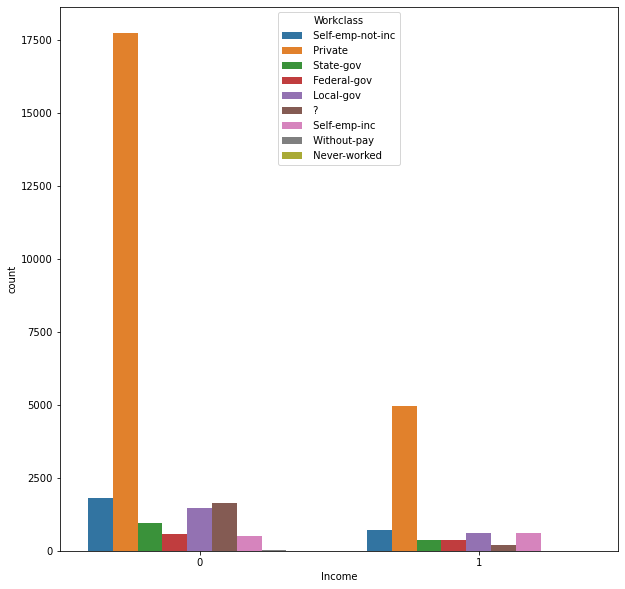

In [18]:
#Ploting  work class corresponding to income

sns.countplot(x='Income',hue = 'Workclass',data=df)

With the above plot we can identify that private employees will get high income as and Unknown with ? we can drop them

#Ploting Education corresponding to income

<AxesSubplot:xlabel='Income', ylabel='count'>

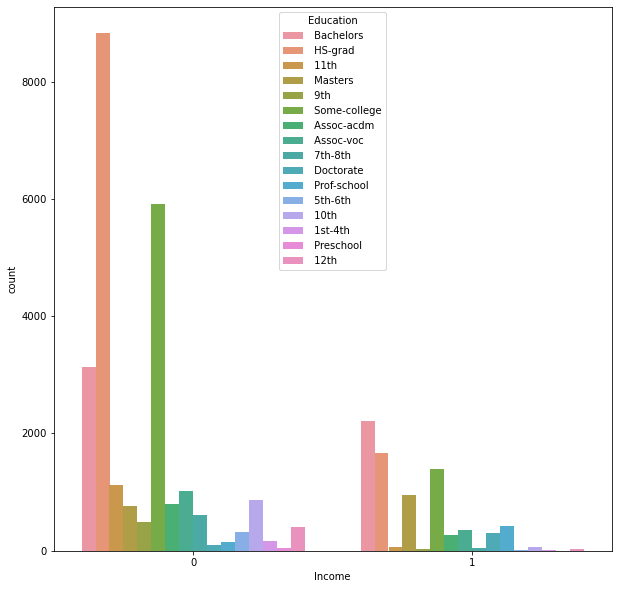

In [19]:
sns.countplot(x='Income',hue='Education',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

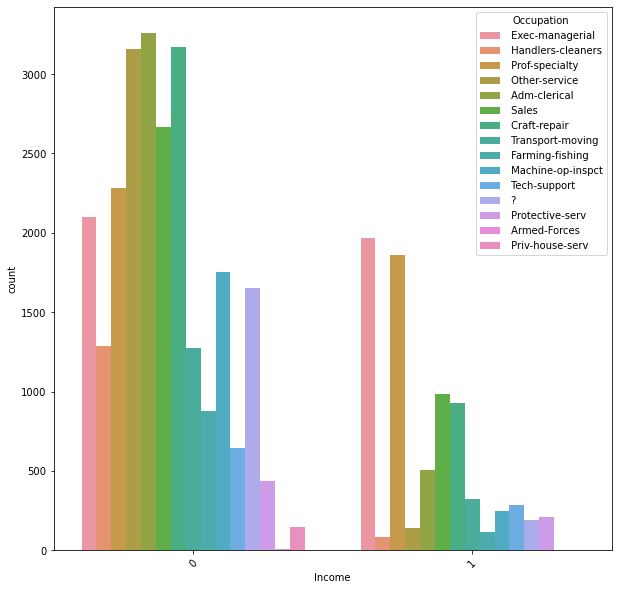

In [20]:
#plot occupation corresponding to income

plt.xticks(rotation=45)
sns.countplot(x='Income',hue='Occupation',data=df)

<AxesSubplot:xlabel='Income', ylabel='count'>

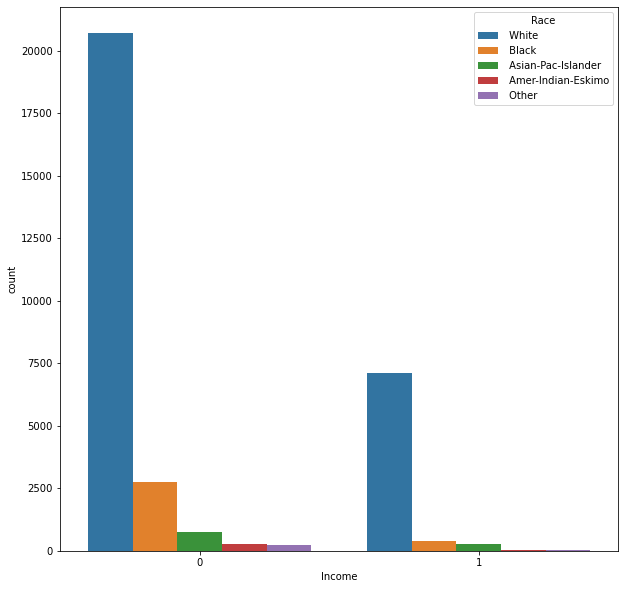

In [21]:
sns.countplot(x='Income',hue='Race',data=df)

With the above plot we can understand that majority information is about White race

In [22]:
#Since majoirty of Race  is white ,the rest of races can be combined together to form a new group

df['Race'].unique()
df['Race'].replace(['Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'],'Other',inplace=True)

<AxesSubplot:xlabel='Income', ylabel='count'>

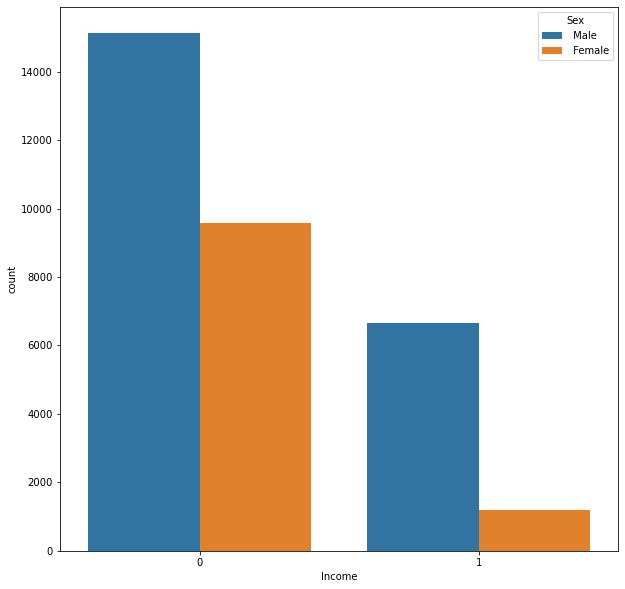

In [23]:
sns.countplot(x='Income',hue='Sex',data=df)

In [24]:
count=df['Native_country'].value_counts()
count

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Text(0.5, 1.0, 'Count from each Country')

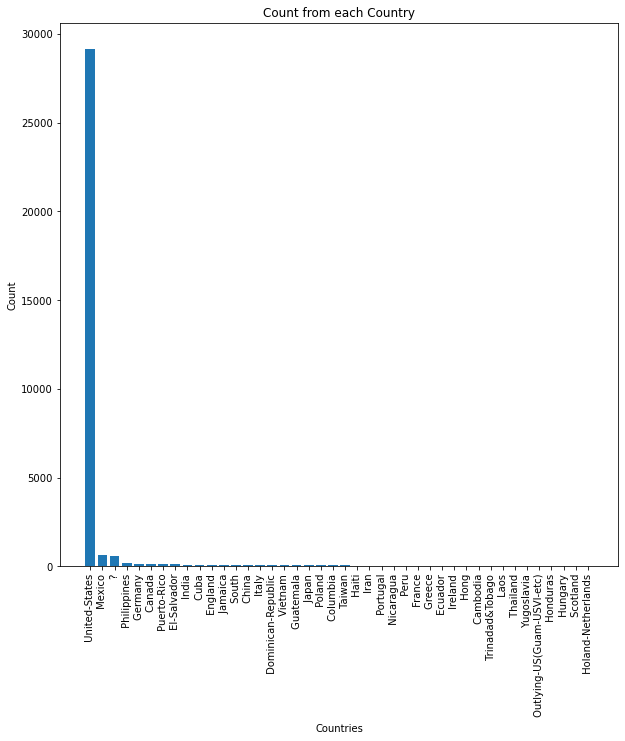

In [25]:
#Plot country corresponding to income

plt.bar(count.index,count.values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')


With the above graph we can understand that some missing values in country column denodted by ? As they are very less we can drop them

The majority of adults from united states so we can distribute column as United state and others

In [26]:
#Combining all other into one class

countries=np.array(df['Native_country'].unique())
countries=np.delete(countries,0)

In [27]:
df['Native_country'].replace(countries,'Other',inplace=True)
df['Native_country'].replace(countries,'Other',inplace=True)

<AxesSubplot:xlabel='Native_country', ylabel='count'>

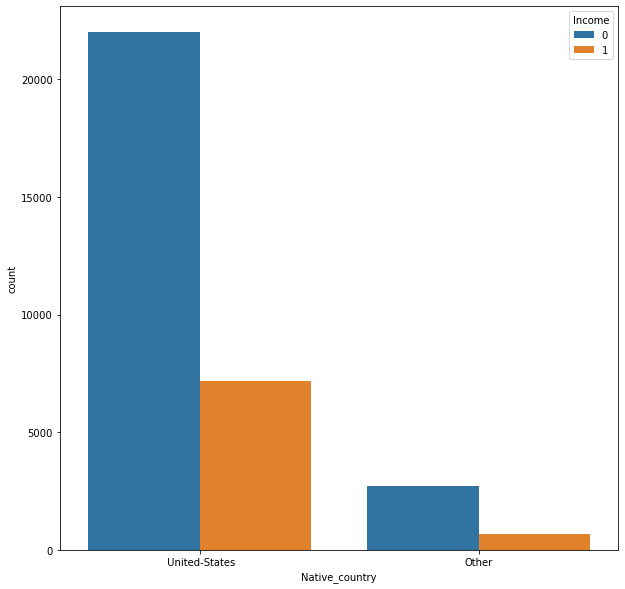

In [28]:
sns.countplot(x='Native_country',hue='Income',data=df)

In [29]:
#Splitting the data into features and outcome

X=df.drop(['Income'],axis=1)
y=df['Income']

In [30]:
X.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital Diff
0,Adult,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Lessor Hours,United-States,Minor
1,Adult,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal Hours,United-States,Minor
2,Old,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Normal Hours,United-States,Minor
3,Adult,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Normal Hours,Other,Minor
4,Adult,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,Normal Hours,United-States,Minor


In [31]:
#Splitting dataset to Training and testing dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [32]:
from sklearn import preprocessing

categorical=['Age','Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Hours_per_week','Native_country','Capital Diff']

for feature in categorical:
    le=preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature]=le.transform(X_test[feature])

In [33]:
#Using Standard Scaler to normalize the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train=pd.DataFrame(scaler.fit_transform(X_train),columns = X.columns)

X_test =  pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [34]:
X_train.head()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital Diff
0,-0.740944,0.091276,-0.336719,1.130492,-0.406808,-0.609391,-0.899268,0.394607,0.699993,-1.416263,-0.342375,0.232514
1,0.515001,1.463992,-0.336719,1.130492,-0.406808,-0.373007,-0.899268,0.394607,0.699993,-1.416263,-0.342375,0.232514
2,-0.740944,0.091276,0.181056,-0.420373,0.926089,-0.609391,-0.277542,0.394607,-1.428586,-1.416263,-0.342375,0.232514
3,-0.740944,0.091276,-1.372268,-2.358954,-1.739704,-0.136623,-0.277542,0.394607,0.699993,0.851360,-0.342375,0.232514
4,-0.740944,0.091276,0.181056,-0.420373,-0.406808,1.281681,2.209359,-1.962629,-1.428586,0.851360,-0.342375,0.232514


All the columns has been converted to numerical data type

In [35]:
#Applying Random forest Algorithm

random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train,y_train)
acc_random_forest=round(random_forest.score(X_train,y_train)*100,2)

In [36]:
#Applying Logistic Regression Algorithm

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_prediction = logreg.predict(X_test)

acc_log=round(logreg.score(X_train,y_train)*100,2)


In [37]:
#Applying KNN

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,y_train)*100,2)

In [38]:
#Applying GaussianNB Algorithm

gaussian=GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian=round(gaussian.score(X_train,y_train)*100,2)

In [39]:
#Applying support vector machine algorithm

linear_SVC=LinearSVC()
linear_SVC.fit(X_train,y_train)
y_prediction=linear_SVC.predict(X_test)

acc_linear_SVC=round(linear_SVC.score(X_train,y_train)*100,2)

C:\anaconda\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
#Applying Decision Tree algorithm


Decision_tree=DecisionTreeClassifier()
Decision_tree.fit(X_train,y_train)

y_prediction = Decision_tree.predict(X_test) 

acc_Decision_tree=round(Decision_tree.score(X_train,y_train)*100,2)

In [41]:
#plotting the accuracy of used algorithms to find best fit

results=pd.DataFrame({'Model':['Support vector machines','KNN','LogisticRegression','Random Forest classifier','Naive bayes','Decision Tree'],
                      'Score':[acc_linear_SVC,acc_knn,acc_log,acc_random_forest,acc_gaussian,acc_Decision_tree]})

result_df=results.sort_values(by ='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df.head(7)

,Model
Score,
90.12,Random Forest classifier
90.12,Decision Tree
86.41,KNN
82.72,LogisticRegression
82.54,Support vector machines
82.10,Naive bayes


In [42]:
#finding significance of each feature in the best fit model

importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(5)

,importance
feature,
Relationship,0.166
Education_num,0.140
Occupation,0.138
Capital Diff,0.134
Marital_status,0.113


<AxesSubplot:xlabel='feature'>

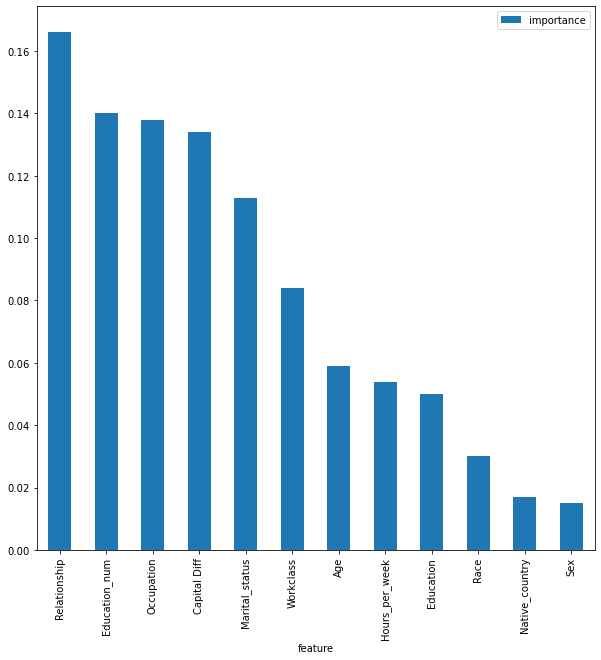

In [43]:
importances.plot.bar()

In [44]:
# since which have low significance  can drop that columns to avoid overfitting

df=df.drop('Sex',axis=1)
df=df.drop('Race',axis=1)
df=df.drop('Native_country',axis=1)

In [45]:
# checking the accuracy after droping the columns

random_forest =  RandomForestClassifier(n_estimators=100,oob_score=True)
random_forest.fit(X_train,y_train)
y_prediction=random_forest.predict(X_test)

random_forest.score(X_train,y_train)

acc_random_forest=round(random_forest.score(X_train,y_train)*100,2)
print(round(acc_random_forest,2,),'%')

90.12 %


# Accuracy remains same after droping unnecessary columns hence it is best performing model for out datset

In [46]:
import pickle

pickle.dump(random_forest,open('random_forest','wb'))